In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'NonStdAdd.tsv'
df=pd.read_table(file)

In [3]:
postalCodePattern        = re.compile("\\b([0-9]{4})([1-9]{2})") #non-generalized postal code
preFormedMKTSCodePattern = re.compile("\\b[A-Z]{2}[0-9]+-[0-9]+[A-Z]\\b") #formal MKTS code
unstructMKTSCodePattern  = re.compile("\\b([A-Z]{3})(:|)(\\s[0-9]+|[0-9]+)(|[A-Z])((\\s|)[A-Z]{2}(:|)(\\s[0-9]+|[0-9]+))\\b") #overfitted
commaMKTSCodePattern     = re.compile("(LOT)(\\s:\\s|\\s:|:\\s|:|)(\\d+\\w)(,\\s*\\d+\\w)*(|\\s|\\s+|(\\w+)\\s+)(|\\w+)\\s(\\w{2})(\\s:\\s|\\s:|:\\s|:|)(\\d+)") #overfitted

In [4]:
df=pd.read_table(file)

In [5]:
print(postalCodePattern.search("9 TAGORE LANE  SINGAPORE 787472"))
print(preFormedMKTSCodePattern.search("MK24-05887A, MK24-05888K AT 568 & 570 MACPHERSON ROAD"))
print(unstructMKTSCodePattern.search("LOT 4249 MK 20 JALAN KAYU SINGAPORE 790000"))
print(commaMKTSCodePattern.search("LOT: 10809X, 06833W, 07209V (PT), 07210M MK: 27,28 FOR BEDOK N3C20 AT BEDOK NORTH STREET 4 / BEDOK NORTH ROAD-CONTRACT NO: D/069/13"))

<_sre.SRE_Match object; span=(25, 31), match='787472'>
<_sre.SRE_Match object; span=(0, 11), match='MK24-05887A'>
<_sre.SRE_Match object; span=(0, 14), match='LOT 4249 MK 20'>
None


In [6]:
df.iloc[[442]] #need to catch invalid rows of data

,Address,Count
442,NaN,20


In [7]:
def categorize(address):
    category=''
    try:
        match = postalCodePattern.search(address)
        if match is not None:
            category += 'postalCode'
    except (ValueError, TypeError):
        pass
    
    try:
        match = preFormedMKTSCodePattern.search(address)
        if match is not None:
            if len(category)!=0:
                category += " + "
            category += 'preFormedMKTSCode'
    except (ValueError, TypeError):
        pass
        
    try:
        match = unstructMKTSCodePattern.search(address)
        if match is not None:
            if len(category)!=0:
                category += " + "
            category += 'unstructMKTSCode'
    except (ValueError, TypeError):
        pass
        
    try:
        match = commaMKTSCodePattern.search(address)
        if match is not None:
            if len(category)!=0:
                category += " + "
            category += 'commaMKTSCode'
    except (ValueError, TypeError):
        pass
    
    if len(category)==0:
                category = "Uncategorized"
    return category

In [8]:
df['category'] = df.apply(lambda row: categorize(row['Address']), axis=1)

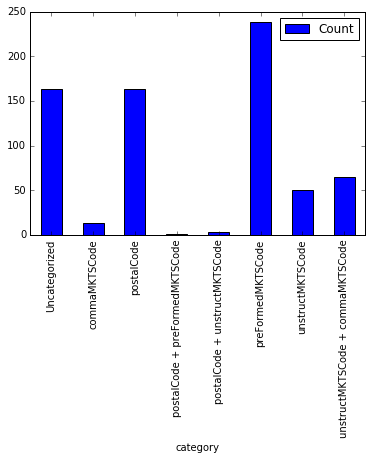

                                  Count
category                               
Uncategorized                       164
commaMKTSCode                        13
postalCode                          164
postalCode + preFormedMKTSCode        1
postalCode + unstructMKTSCode         3
preFormedMKTSCode                   239
unstructMKTSCode                     51
unstructMKTSCode + commaMKTSCode     65


In [9]:
catdf = df.groupby('category').count()
catdf = catdf.drop('Address',1)
catdf.plot(kind='bar')
plt.show()
print(catdf)

['Uncategorized - 23.43 %', 'commaMKTSCode - 1.86 %', 'postalCode - 23.43 %', 'postalCode + preFormedMKTSCode - 0.14 %', 'postalCode + unstructMKTSCode - 0.43 %', 'preFormedMKTSCode - 34.14 %', 'unstructMKTSCode - 7.29 %', 'unstructMKTSCode + commaMKTSCode - 9.29 %']


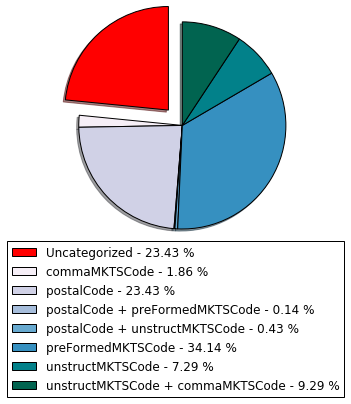

In [12]:
categories = np.char.array(catdf.index.tolist())
sizes = np.array(catdf['Count'].tolist())
colors = ['red', '#f6eff7', '#d0d1e6', "#a6bddb", '#67a9cf', '#3690c0', '#02818a', '#016450']
explode = tuple([0.2]+[0]*7)
percent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(categories, percent)]
print(labels)

patches, texts = plt.pie(sizes,explode=explode,colors=colors, shadow=True, startangle=90)

plt.axis('equal')
plt.legend(patches,labels,loc='center', bbox_to_anchor=(0.5, -0.4))
plt.show()